# Project Name : Paisa Bazaar Credit Score Project

## Project Target : Paisa Bazaar Project EDA and Sucess credit score prediction.

### Contribution : Individual.
### Name : Mirza Niyaz Baig.

## Project Summary :

In this project, I created a machine learning model that predicts a person's credit score as Poor, Standard, or Good. The model uses four main inputs:
Age, Annual Income, Number of Credit Cards, and Number of Delayed Payments.

First, I cleaned the dataset and selected only the important features that actually affect the credit score. Then I trained a Random Forest Classifier, which is a strong and accurate algorithm for classification problems.

I also handled the problem of data imbalance (when one category appears more than others) so that the model doesn't always predict the same result. Finally, I built a simple prediction system where a user can enter their details and get their predicted credit score.

I also made a visual meter (like a credit arrow gauge) that shows whether the score is poor, standard, or good — just like credit apps (e.g., Paisabazaar or CIBIL) show.

## GitHub Link:
#### https://github.com/mirza-py/Credit-Score-Prediction-Using-ML

## Problem Statement :
The goal of this project is to develop a machine learning model that can accurately predict an individual's credit score category (Poor, Standard, or Good) using basic financial and personal information such as age, income, number of credit cards, and history of delayed payments. This helps in improving loan approval decisions and reducing financial risk for lenders.

# Let's Begin-

## Import Libraries:

In [86]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load And Explore Data:

In [87]:
# Load dataset
df = pd.read_csv("paisabazar_data.csv")

In [88]:
# Print first 5 rows
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [89]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## EDA

In [90]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [91]:
# Drop irrelevant columns
df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'], axis =1,inplace=True)

In [92]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [71]:
# Encode categorical columns
cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [72]:
for col in df.select_dtypes(include='object').columns:
    if col != 'Credit_Score':
        df[col] = LabelEncoder().fit_transform(df[col])


## Visualizations

### Credit Score Distribution

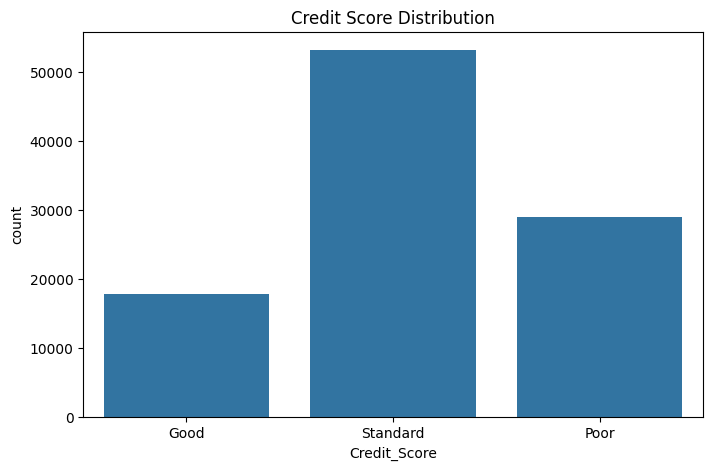

In [93]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Credit_Score')
plt.title("Credit Score Distribution")
plt.show()

###  Age vs Credit Score

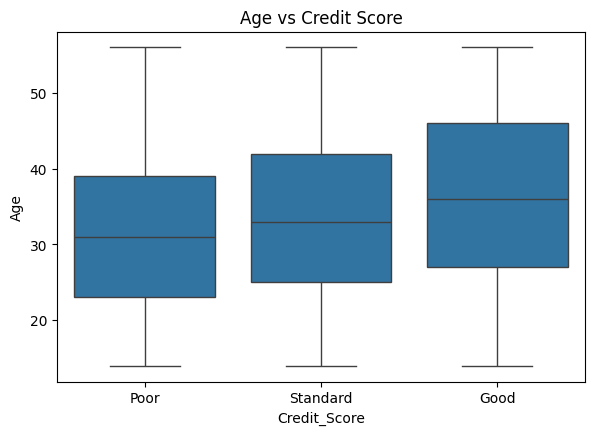

In [94]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Credit_Score', y='Age', order=['Poor', 'Standard', 'Good'])
plt.title('Age vs Credit Score')
plt.show()

###  Income vs Credit Score

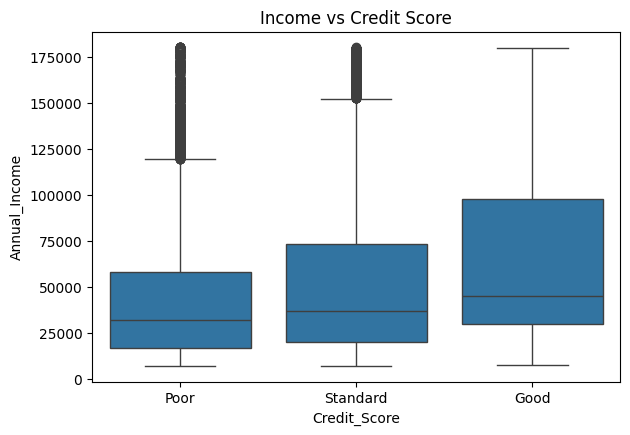

In [76]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Credit_Score', y='Annual_Income', order=['Poor', 'Standard', 'Good'])
plt.title('Income vs Credit Score')
plt.show()

### Outstanding Debt vs Credit Score

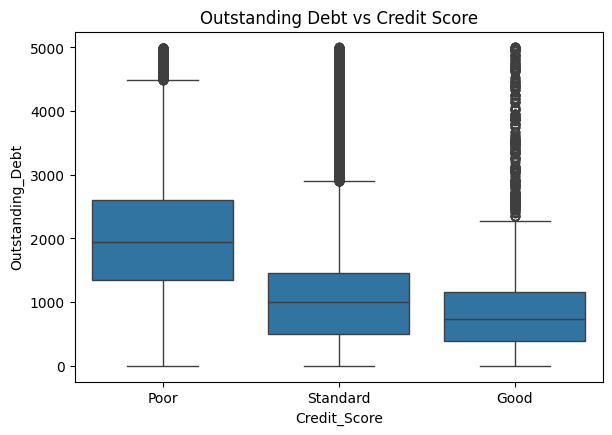

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Credit_Score', y='Outstanding_Debt', order=['Poor', 'Standard', 'Good'])
plt.title('Outstanding Debt vs Credit Score')
plt.show()

## Training the Model

### Preprocess Data

In [78]:
# Model Preparation
features = ['Age', 'Annual_Income', 'Num_Credit_Card', 'Num_of_Delayed_Payment']
X = df[features]
y = df['Credit_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Fit Model

In [95]:
model = RandomForestClassifier(class_weight='balanced',random_state=3)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=3)

## Evalute Model

In [96]:
y_pred = model.predict(X_test)
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.76

Classification Report:
               precision    recall  f1-score   support

        Good       0.70      0.75      0.72      5414
        Poor       0.73      0.78      0.76      8742
    Standard       0.79      0.74      0.77     15844

    accuracy                           0.76     30000
   macro avg       0.74      0.76      0.75     30000
weighted avg       0.76      0.76      0.76     30000



## Predictive System

In [97]:
#Build Predictive System
def predict_credit_score(age, income, num_cards, late_pays):
    # Create a new sample with default (mean/mode) values for unused columns
    sample = pd.DataFrame([X.mean()])
    
    # Override the user input values
    sample['Age'] = age
    sample['Annual_Income'] = income
    sample['Num_Credit_Card'] = num_cards
    sample['Num_of_Delayed_Payment'] = late_pays
    
    # Predict and return result
    prediction = model.predict(sample)[0]
    return prediction

#User Input Section
print("Credit Score Prediction System")
age = int(input("Enter Age: "))
income = float(input("Enter Annual Income (e.g. 50000): "))
cards = int(input("Enter Number of Credit Cards: "))
late_pays = int(input("Enter Number of Delayed Payments: "))

result = predict_credit_score(age, income, cards, late_pays)
print(f"\n🎯 Predicted Credit Score Category: {result}")

Credit Score Prediction System


Enter Age:  21
Enter Annual Income (e.g. 50000):  20000
Enter Number of Credit Cards:  4
Enter Number of Delayed Payments:  1



🎯 Predicted Credit Score Category: Standard


## Designed Predictive System

In [98]:
def credit_score_meter(model, X):
    print("=== Credit Score Prediction System ===")
    age = int(input("Enter Age: "))
    income = float(input("Enter Annual Income: "))
    cards = int(input("Enter Number of Credit Cards: "))
    late = int(input("Enter Number of Delayed Payments: "))

    # Build input row
    sample = X.mean().to_dict()
    sample['Age'] = age
    sample['Annual_Income'] = income
    sample['Num_Credit_Card'] = cards
    sample['Num_of_Delayed_Payment'] = late
    sample_df = pd.DataFrame([sample])

    # Predict
    prediction = model.predict(sample_df)[0]

    # Map categories to positions
    labels = ['Poor', 'Standard', 'Good']
    colors = ['red', 'orange', 'green']
    label_pos = {'Poor': 0, 'Standard': 1, 'Good': 2}
    pos = label_pos[prediction]

    # Draw horizontal gauge
    fig, ax = plt.subplots(figsize=(8, 2))
    
    # Colored bars
    for i, (label, color) in enumerate(zip(labels, colors)):
        ax.barh(0, 1, left=i, color=color, edgecolor='black', height=0.5)

    # Arrow indicator
    ax.plot(pos + 0.5, 0.25, marker='v', markersize=20, color='black')
    ax.text(pos + 0.5, 0.5, 'You are here', ha='center', fontsize=10, weight='bold')

    # Label section
    for i, label in enumerate(labels):
        ax.text(i + 0.5, -0.3, label, ha='center', fontsize=12, weight='bold')

    ax.set_xlim(0, 3)
    ax.axis('off')
    plt.title(f"🎯 Predicted Credit Score: {prediction}", fontsize=14)
    plt.tight_layout()
    plt.show()


=== Credit Score Prediction System ===


Enter Age:  21
Enter Annual Income:  20000
Enter Number of Credit Cards:  3
Enter Number of Delayed Payments:  1


C:\Users\baigm\AppData\Local\Temp\ipykernel_24468\2519104421.py:43: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\baigm\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


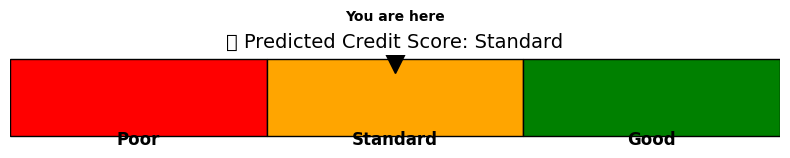

In [99]:
credit_score_meter(model, X)

## Conclusion :

### In this project, I successfully built a credit score prediction system using machine learning. The model takes simple user inputs like age, income, number of credit cards, and delayed payments, and predicts the credit score category. By using a Random Forest Classifier and handling data imbalance, the model gives reliable results. A visual arrow gauge was also added to make the output easy to understand. This system can help financial institutions make better and faster decisions.